## 파이썬 머신러닝
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 LinearSVM 과 같이 각 클래스를 **직선** 또는 **평면** 으로 가른다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,1,'make_blobs() - 400 samples')

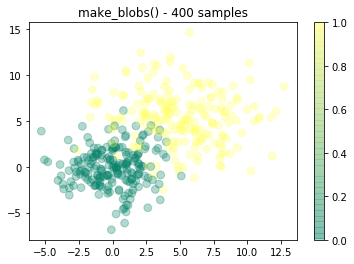

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(400, 2, [[0,0],[5,5]], [2,3])

plt.scatter(X[:,0], X[:,1], c=y, s=60, alpha=0.3, cmap='summer')
plt.colorbar()
plt.title('make_blobs() - 400 samples')

In [5]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    
    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    
    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers a

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
print(score)

0.9325


In [6]:
display(model.coef_, model.intercept_)

array([[0.74056633, 0.7114742 ]])

array([-2.99652071])

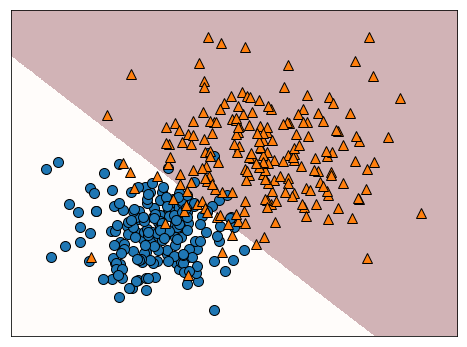

In [7]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### LinearSVM 적용

In [11]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)
score = model.score(X, y)
print(score)

0.92


In [12]:
display(model.coef_, model.intercept_)

array([[0.24046027, 0.25201654]])

array([-1.15601249])

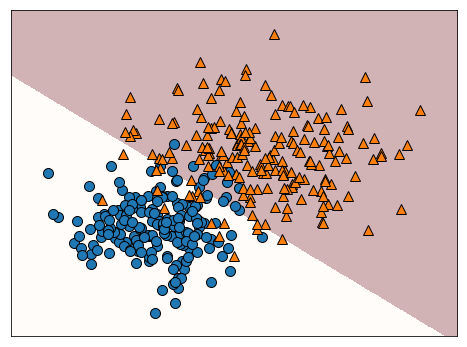

In [13]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

- 로지스틱회귀는 아래와 같은 시그모이드 함수를 적용하는 알고리즘이다.

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

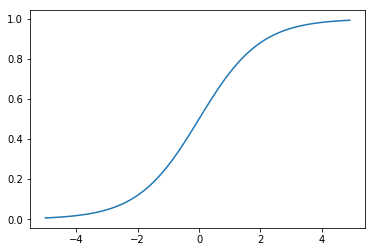

In [13]:
rng = np.arange(-5, 5, 0.1)
plt.plot(rng, sigmoid(rng))

Text(0.5,0,'target')

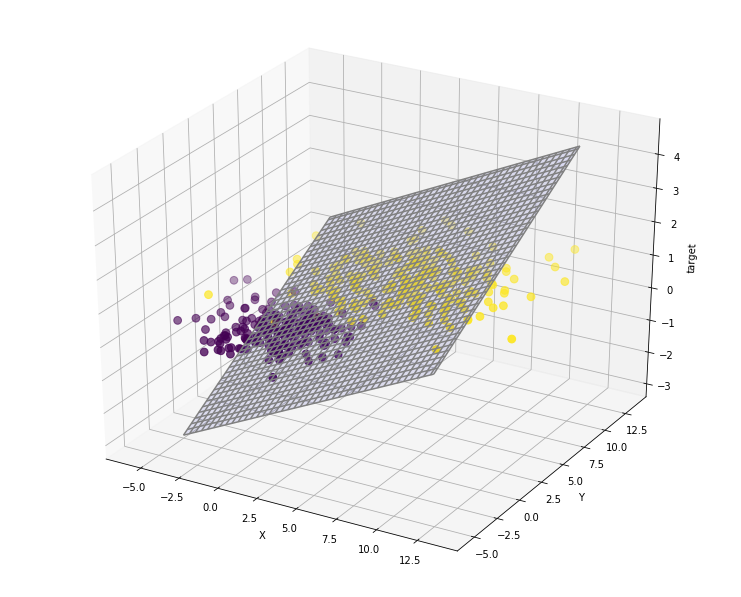

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                shade=True, alpha=0.1, color='b')
ax.plot_wireframe(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

#ax.view_init(60, 70)

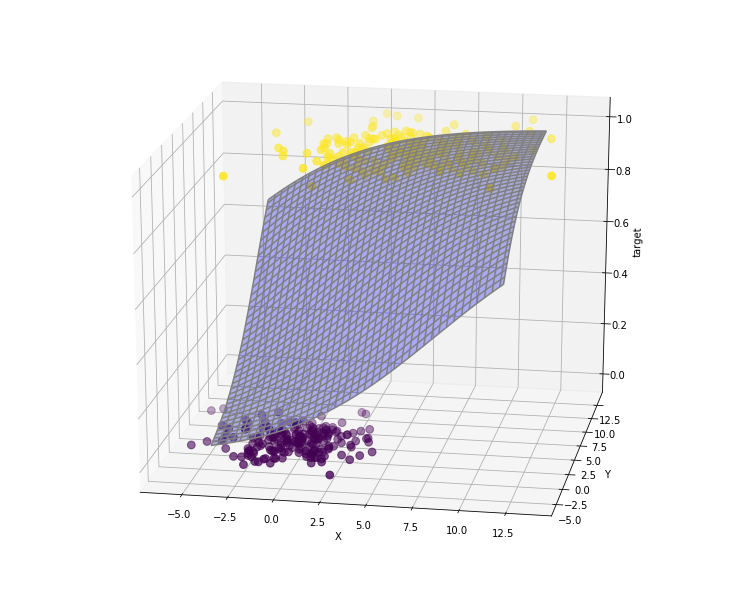

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                shade=True, alpha=0.3, color='b')
ax.plot_wireframe(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

ax.view_init(20, -80)

- 각 클래스에 속할 확률은 model.predict_proba() 함수로 알 수 있다.
- 각 행의 합은 1(100%)가 된다.

In [74]:
display(model.predict_proba(X)[:10], y[:10])

array([[9.98664212e-01, 1.33578826e-03],
       [2.96447658e-03, 9.97035523e-01],
       [9.87513032e-03, 9.90124870e-01],
       [9.73755412e-01, 2.62445881e-02],
       [3.40304775e-05, 9.99965970e-01],
       [1.43541711e-06, 9.99998565e-01],
       [1.51971018e-04, 9.99848029e-01],
       [3.31922924e-04, 9.99668077e-01],
       [9.92520641e-01, 7.47935859e-03],
       [1.24521532e-04, 9.99875478e-01]])

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [77]:
model.decision_function(X)[:10]

array([-6.61689702,  5.81808591,  4.60781156, -3.61370036, 10.28822001,
       13.45405364,  8.79166875,  8.0102758 , -4.88810077,  8.99090738])

### 클래스가 3개인 경우

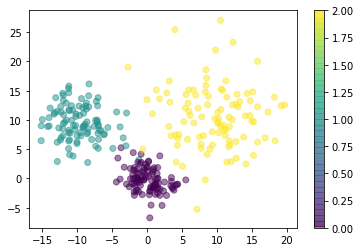

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(300, 2, [[0,0],[-10,10],[10,10]], [2,3,5])

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar()

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
score

0.9766666666666667

In [20]:
display(model.coef_, model.intercept_)

array([[-0.13884031, -1.03421002],
       [-0.7475626 ,  0.26958788],
       [ 0.66726845,  0.39062545]])

array([ 2.71449232, -4.12089106, -3.33459183])

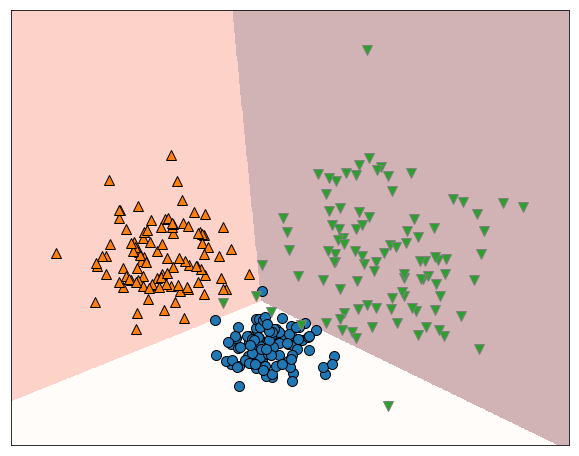

In [21]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

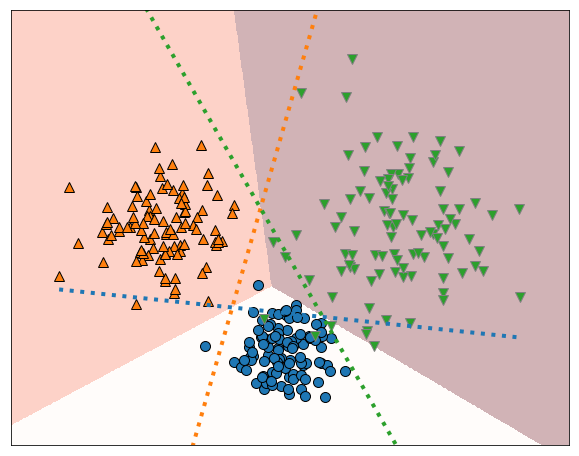

In [27]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4)

In [22]:
display(model.predict_proba(X)[:10], y[:10])

array([[1.03800026e-03, 3.61975173e-06, 9.98958380e-01],
       [1.95994286e-04, 9.45260123e-01, 5.45438831e-02],
       [1.27570707e-04, 1.78616711e-06, 9.99870643e-01],
       [5.04669806e-01, 4.92367567e-01, 2.96262673e-03],
       [3.75086851e-06, 9.32952241e-04, 9.99063297e-01],
       [9.56484628e-01, 1.84643470e-03, 4.16689372e-02],
       [2.64410909e-03, 9.96695681e-01, 6.60210408e-04],
       [4.20556285e-03, 9.95093267e-01, 7.01169685e-04],
       [2.30586192e-04, 9.89593587e-01, 1.01758264e-02],
       [6.03451831e-04, 3.50178798e-04, 9.99046369e-01]])

array([2, 1, 2, 0, 2, 0, 1, 1, 1, 2])

In [23]:
model.decision_function(X)[:10]

array([[ -6.86852245, -12.52820417,   8.8397981 ],
       [ -8.50907142,   3.55634826,  -2.82286134],
       [ -8.96660735, -13.23533188,  10.61600137],
       [  0.49315469,   0.42933554,  -5.61084365],
       [-12.49300921,  -6.97571251,   7.758587  ],
       [  5.17655528,  -6.25371822,  -3.09485397],
       [ -5.93008336,   7.37459489,  -7.31960676],
       [ -5.46315565,   6.94965351,  -7.25809614],
       [ -8.36760371,   5.67902637,  -4.57038977],
       [ -7.41507623,  -7.95955125,   5.57404738]])

- 로지스틱회귀의 중요 옵션은 LinearSVC 와 마찬가지로 C 이다.
- C 값이 커질수록 학습데이터에 최대한 맞추려고 한다. 즉 과대적합된다.

0.9833333333333333


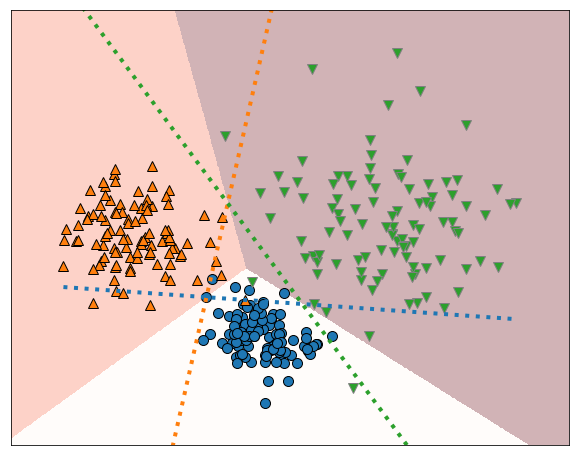

In [51]:
model = LogisticRegression(C=1000)
model.fit(X, y)
score = model.score(X, y)
print(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4)

### Iris 데이터 - 속성 2개로 제한

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()

col1 = 1
col2 = 3

X = iris.data[:, [col1,col2]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

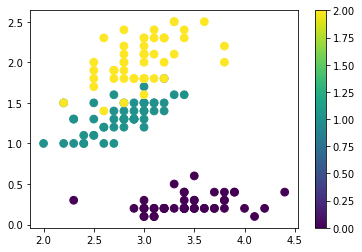

In [15]:
plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.colorbar()

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1)
model.fit(X, y)
score = model.score(X, y)
score

0.9466666666666667

In [17]:
display(model.coef_, model.intercept_)

array([[ 1.17857118, -4.20397905],
       [-1.06767017,  0.30439343],
       [-1.72595521,  3.95376877]])

array([-0.36473596,  2.07538234, -1.53014082])

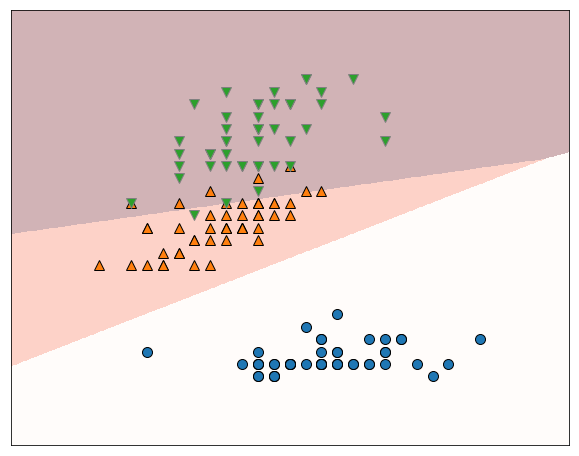

In [18]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

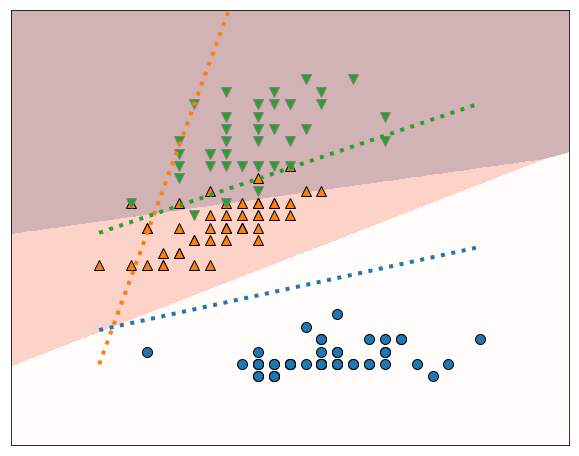

In [19]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(model.coef_[i,0]*rng + model.intercept_[i])/model.coef_[i,1], ':', lw=4)

### Iris 데이터 - 모든 속성 사용

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(score_train, score_test)

0.9642857142857143 0.9473684210526315


In [22]:
display(model.coef_, model.intercept_)

array([[ 0.42258361,  1.32597849, -2.16247393, -0.99107654],
       [ 0.32711721, -1.3732625 ,  0.52277676, -0.99198918],
       [-1.6421272 , -1.30000951,  2.32818782,  2.19900624]])

array([ 0.25293147,  0.83126078, -1.03436611])

### 옵션(C) 변경 및 과적합 판단

Text(0,0.5,'score')

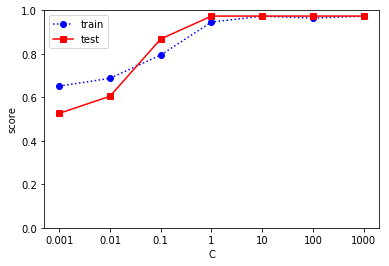

In [38]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

s1 = []
s2 = []

for c in Cs:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    s1.append(score_train)
    s2.append(score_test)
    
plt.plot(s1,'bo:')
plt.plot(s2,'rs-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)),Cs)
plt.ylim(0,1)
plt.xlabel('C')
plt.ylabel('score')

### 시그모이드(sigmoid) 함수 적용

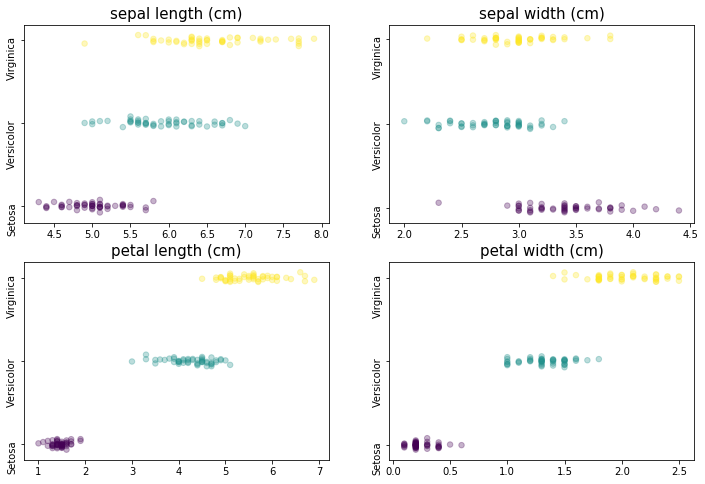

In [39]:
plt.figure(figsize=[12,8])

for col in range(4):
    plt.subplot(2,2,col+1)
    plt.scatter(iris.data[:,col], iris.target + np.random.normal(0,0.03,size=len(y)), c=iris.target, s=30, alpha=0.3)
    plt.yticks([0,1,2], ['Setosa', 'Versicolor', 'Virginica'], rotation=90)
    plt.title(iris.feature_names[col], fontsize=15)

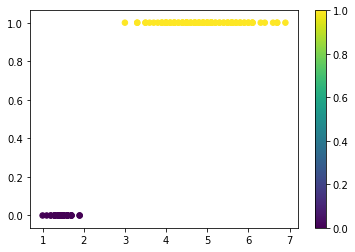

In [27]:
X = iris.data[:,[2]]
y = iris.target.copy()
y[y==2]=1

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

In [28]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0.5,1,'Sigmoid')

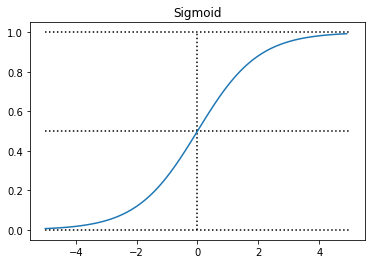

In [42]:
rng = np.arange(-5,5,0.1)
plt.plot(rng, sigmoid(rng))

plt.hlines([0,0.5,1],-5,5,linestyles='dotted')
plt.vlines([0],0,1,linestyles='dotted')
plt.title('Sigmoid')

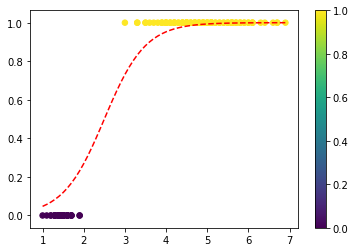

In [43]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, sigmoid(2*(rng-2.5)), 'r--')

In [78]:
C = 1
model = LogisticRegression(C=C)
model.fit(X, y)

display(model.score(X, y), model.coef_, model.intercept_)

1.0

array([[1.72960591]])

array([-4.28674842])

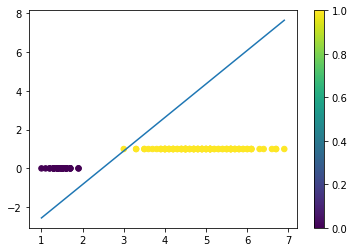

In [79]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)

In [80]:
경계값 = -model.intercept_/model.coef_
경계값

array([[2.47845384]])

Text(0.5,1,'LogisticRegression (C=1.000000)')

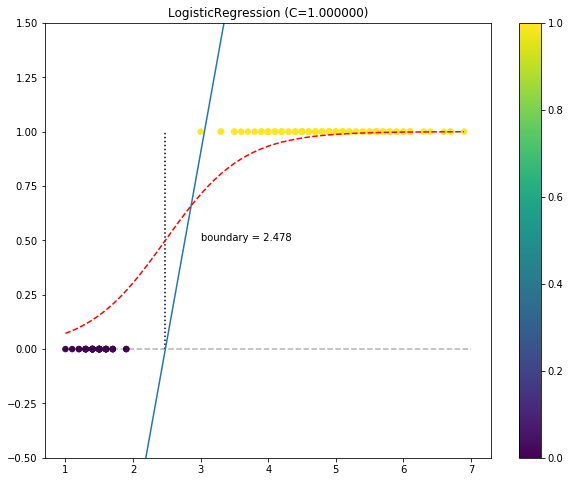

In [81]:
plt.figure(figsize=[10,8])

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)
plt.plot(rng, sigmoid(model.coef_[0,0]*rng+model.intercept_[0]), 'r--')
plt.vlines([-model.intercept_[0]/model.coef_[0,0]],0,1,linestyles='dotted')
plt.hlines([0],1,7,linestyles='dashed', alpha=0.3)
plt.text(3, 0.5, 'boundary = %.3f' % (-model.intercept_[0]/model.coef_[0,0]))
plt.ylim(-0.5, 1.5)
plt.title('LogisticRegression (C=%f)' % C)

### 관련 기술
- 공식
$$ sigmoid(t) = \frac{1}{1 + e^{-t}} $$
<br>
$$ t = w \cdot x + b $$
<br>
$$ sigmoid(t) = \frac{1}{1 + e^{-(w \cdot x + b)}} $$
<br>
$$ t = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + b $$
- 소프트맥스(softmax) 함수
- 크로스 엔트로피 (cross entropy)